# 📊 Análisis Exploratorio de Datos (EDA) - Premium Choice

**Objetivo:** Entender la estructura, calidad y relaciones en los datos de Premium Choice para informar el diseño de un sistema de agentes de IA.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Librerías importadas exitosamente.")

Librerías importadas exitosamente.


## 1. Carga de Datos

Cargamos todos los archivos de datos en un diccionario de DataFrames para un fácil acceso.

In [3]:
import os
import glob

def cargar_datos_completos(base_path='../data/raw/'):
    """
    Carga todos los archivos .xlsx del directorio, manteniendo cada uno en un DataFrame separado
    y concatenando los que tienen patrones anuales.
    Devuelve un diccionario de DataFrames.
    """
    all_files = glob.glob(os.path.join(base_path, "*.xlsx"))
    
    dataframes = {}
    
    # Cargar archivos únicos
    single_files = ['articulos.xlsx', 'clientes.xlsx', 'proveedores.xlsx']
    for f_path in all_files:
        f_name = os.path.basename(f_path)
        if f_name in single_files:
            df_name = f_name.split('.')[0]
            dataframes[df_name] = pd.read_excel(f_path)
            print(f"Cargado: {f_name} como '{df_name}'")

    # Cargar y concatenar archivos con patrones temporales
    prefixes = ['compras_dcto_items', 'compras_dcto', 'ventas_dcto_items', 'ventas_dcto']
    for prefix in prefixes:
        files_to_concat = [f for f in all_files if os.path.basename(f).startswith(prefix)]
        if not files_to_concat: continue
            
        df_list = [pd.read_excel(f) for f in files_to_concat]
        concatenated_df = pd.concat(df_list, ignore_index=True)
        dataframes[prefix] = concatenated_df
        print(f"Cargados y concatenados {len(df_list)} archivos para el prefijo '{prefix}'")
        
    return dataframes

# Ajusta la ruta si es necesario. Asumo que este nuevo notebook también está en la carpeta `notebooks/`
data_path = '../data/raw/'
dfs = cargar_datos_completos(base_path=data_path)

print(f"\nCarga completa. Tenemos {len(dfs)} DataFrames listos para analizar.")

Cargado: articulos.xlsx como 'articulos'
Cargado: proveedores.xlsx como 'proveedores'
Cargado: clientes.xlsx como 'clientes'
Cargados y concatenados 7 archivos para el prefijo 'compras_dcto_items'
Cargados y concatenados 14 archivos para el prefijo 'compras_dcto'
Cargados y concatenados 15 archivos para el prefijo 'ventas_dcto_items'
Cargados y concatenados 28 archivos para el prefijo 'ventas_dcto'

Carga completa. Tenemos 7 DataFrames listos para analizar.


## 2. Inspección Inicial de Tablas Clave

Revisemos las tablas más importantes: `ventas_dcto_items`, `clientes`, y `articulos`.

In [5]:
# Inspeccionar la tabla de items de ventas
print("--- Información de: ventas_dcto_items ---")
if 'ventas_dcto_items' in dfs:
    df_ventas_items = dfs['ventas_dcto_items']
    print(df_ventas_items.info())
    print("\nPrimeras 5 filas:")
    display(df_ventas_items.head())
    print("\nResumen estadístico:")
    display(df_ventas_items.describe())
else:
    print("DataFrame 'ventas_dcto_items' no encontrado.")

# Inspeccionar la tabla de clientes
print("\n--- Información de: clientes ---")
if 'clientes' in dfs:
    df_clientes = dfs['clientes']
    print(df_clientes.info())
    print("\nPrimeras 5 filas:")
    display(df_clientes.head())
else:
    print("DataFrame 'clientes' no encontrado.")

# Inspeccionar la tabla de articulos
print("\n--- Información de: articulos ---")
if 'articulos' in dfs:
    df_articulos = dfs['articulos']
    print(df_articulos.info())
    print("\nPrimeras 5 filas:")
    display(df_articulos.head())
else:
    print("DataFrame 'articulos' no encontrado.")

--- Información de: ventas_dcto_items ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631714 entries, 0 to 631713
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   cod_cliente               162009 non-null  object        
 1   cliente                   631714 non-null  object        
 2   documento                 631714 non-null  object        
 3   defecha                   631714 non-null  datetime64[ns]
 4   cod_articulo_servicio     631714 non-null  object        
 5   nombre_articulo_servicio  631714 non-null  object        
 6   cantidad                  631714 non-null  float64       
 7   porc_iva                  631714 non-null  int64         
 8   vrgravado                 631714 non-null  float64       
 9   vrnogravado               631714 non-null  float64       
 10  descuento                 631714 non-null  int64         
 11  subtotal               

,cod_cliente,cliente,documento,defecha,cod_articulo_servicio,nombre_articulo_servicio,cantidad,porc_iva,vrgravado,vrnogravado,...,costo,utilidadps,utilidadpc,tipodocumento,cuenta,nomcuenta,icolicoresunitario,bodega,vendedor,distrito
0,CL 100000001136,ADWELLCH S.A.S.,1PCH 30816,2023-10-02,101050,MERMEL PI—A /MANGO ST DALF X 284 GR,12.00,19,193200.00,0.00,...,108313.80,84886.20,78.37,F.COMER,4135 95 39,INGRESOS GRAVADOS COMERCIAL AL 19%,0,1.00,ALZATE ELENA,INSTITUCIONAL
1,CL 100000001136,ADWELLCH S.A.S.,1PCH 30816,2023-10-02,101096,MERMEL MINI CAJA X 4 UNID X 28 GR,6.00,19,79200.00,0.00,...,44394.06,34805.94,78.40,F.COMER,4135 95 39,INGRESOS GRAVADOS COMERCIAL AL 19%,0,1.00,ALZATE ELENA,INSTITUCIONAL
2,CL 100000001136,ADWELLCH S.A.S.,1PCH 30816,2023-10-02,121623,GRANA PADANO X 200 G ZANETTI,12.00,19,238800.00,0.00,...,135770.88,103029.12,75.89,F.COMER,4135 95 39,INGRESOS GRAVADOS COMERCIAL AL 19%,0,1.00,ALZATE ELENA,INSTITUCIONAL
3,CL 100000001136,ADWELLCH S.A.S.,1PCH 30816,2023-10-02,150174,ILE DE FRANCE BRIE X 125 GR,12.00,19,199200.00,0.00,...,127987.80,71212.20,55.64,F.COMER,4135 95 39,INGRESOS GRAVADOS COMERCIAL AL 19%,0,1.00,ALZATE ELENA,INSTITUCIONAL
4,CL 100000001136,ADWELLCH S.A.S.,1PCH 30816,2023-10-02,150179,ILE DE FRANCE CAMEMBERT X 125 GR,6.00,19,95400.00,0.00,...,63993.90,31406.10,49.08,F.COMER,4135 95 39,INGRESOS GRAVADOS COMERCIAL AL 19%,0,1.00,ALZATE ELENA,INSTITUCIONAL



Resumen estadístico:


,defecha,cantidad,porc_iva,vrgravado,vrnogravado,descuento,subtotal,costo,utilidadps,utilidadpc,icolicoresunitario,bodega
count,631714,631714.00,631714.00,631714.00,631714.00,631714.00,631714.00,631714.00,631714.00,631714.00,631714.00,631467.00
mean,2023-08-16 19:34:34.276650496,3.69,14.16,78013.86,7828.15,148.36,85670.79,46811.23,38859.56,351.22,0.00,10.86
min,2019-01-10 00:00:00,-3600.00,0.00,-21344500.00,-23000000.00,0.00,-23000000.00,-14536889.64,-23000000.00,-99.98,0.00,1.00
25%,2022-11-02 00:00:00,1.00,8.00,7870.37,0.00,0.00,10925.93,4111.17,4658.37,51.42,0.00,1.00
50%,2023-08-23 00:00:00,1.00,19.00,18992.27,0.00,0.00,21534.71,10168.75,10863.27,87.91,0.00,4.00
75%,2024-06-14 00:00:00,2.00,19.00,53259.00,0.00,0.00,61830.00,34494.96,30491.34,136.88,0.00,4.00
max,2025-04-30 00:00:00,1934.00,19.00,37047600.00,230000000.00,4482221.00,230000000.00,20993280.00,230000000.00,1785614.00,0.00,53.00
std,NaN,21.25,6.57,386496.27,372477.03,7142.41,536632.17,222420.42,406795.48,10996.63,0.00,17.39



--- Información de: clientes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7909 entries, 0 to 7908
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   codigo         7909 non-null   object
 1   razon social   7909 non-null   object
 2   direccion      7656 non-null   object
 3   nombre ciudad  7909 non-null   object
 4   cod ciudad     7909 non-null   int64 
 5   cupo           7909 non-null   int64 
 6   plazo          7909 non-null   int64 
 7   telefonos      5547 non-null   object
 8   contactos      1116 non-null   object
 9   telefonos.1    5807 non-null   object
 10  telefonos.2    427 non-null    object
 11  email          5605 non-null   object
 12  vendedor       2050 non-null   object
 13  nit            7901 non-null   object
 14  dv             7909 non-null   int64 
 15  distrito       1725 non-null   object
 16  pais           7625 non-null   object
dtypes: int64(4), object(13)
memory usage:

,codigo,razon social,direccion,nombre ciudad,cod ciudad,cupo,plazo,telefonos,contactos,telefonos.1,telefonos.2,email,vendedor,nit,dv,distrito,pais
0,CL 200000000200,100NUTRITION SAS,CALLE 95 # 11A -84 OFICINA 403,BOGOTA - D.C.,11001,0,0,NaN,NaN,3162357062,NaN,MANAGER@CIENUTRITION.ORG,NaN,900967772,2,NaN,CO - COLOMBIA
1,CL 400000000784,ACIE SAS,CR 7 126 30,BOGOTA D. C.,11001,0,0,NaN,NaN,3008003308,NaN,ELGASANCHEZ@GMAIL.COM,NaN,900421292,5,NaN,CO - COLOMBIA
2,CL 400000000305,ADMINISTRADORA MONSERRAT,CR 2 ESTE 21 48,BOGOTA D. C.,11001,0,0,11111111,NaN,3108847077,NaN,NaN,NaN,800124979-1,6,NaN,CO - COLOMBIA
3,CL 200000000319,ALMINISTRADORA MONSERRATE,CARRERA 2 ESTE 21 48,BOGOTA D. C.,11001,0,0,1111111,NaN,3208031265,NaN,DIRECCIONADMINISTRATIVA@RESTAURANTESMONSERRATE...,NaN,800124979,1,NaN,CO - COLOMBIA
4,CL 400000000508,AUDIASESORES,XX,BOGOTA D. C.,11001,0,0,XX,NaN,XX,NaN,NaN,NaN,800211129-9,5,NaN,CO - COLOMBIA



--- Información de: articulos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codigo      5098 non-null   object 
 1   barras      3493 non-null   object 
 2   nombre      5093 non-null   object 
 3   unidad      392 non-null    object 
 4   iva         5098 non-null   int64  
 5   activo      5098 non-null   object 
 6   referencia  151 non-null    object 
 7   kit         5098 non-null   bool   
 8   volumen     5098 non-null   int64  
 9   peso        5098 non-null   float64
 10  codbscula   697 non-null    object 
 11  reginvima   68 non-null     object 
 12  xunidad     5098 non-null   bool   
dtypes: bool(2), float64(1), int64(2), object(8)
memory usage: 448.2+ KB
None

Primeras 5 filas:


,codigo,barras,nombre,unidad,iva,activo,referencia,kit,volumen,peso,codbscula,reginvima,xunidad
0,130220,8851081200245,SALSA CHILE BEST CHOICE X 880 GRS,UNIDAD,19,S,NaN,False,20,0.00,NaN,NaN,True
1,150704,NaN,ALM. CROISSANT JAMON Y QUESO,UNIDAD,8,S,NaN,False,20,0.00,NaN,NaN,True
2,150703,7708687881488,CB. CREMA CHOCO AVELLANA-ALMENDRA S/A 72,UNIDAD,19,N,NaN,False,20,0.00,NaN,NaN,True
3,150701,8410226017645,ACEITUNA NEGRA SIN HUESOxUn,UNIDAD,19,N,NaN,False,20,0.00,NaN,NaN,True
4,150705,8410226069064,ACEITUNA PICARDIASxUn,UNIDAD,19,N,NaN,False,20,0.00,NaN,NaN,True


## 3. Análisis de Negocio y Visualizaciones

Basado en la inspección inicial, nos enfocaremos en tres análisis clave:
1.  Evolución de ventas a lo largo del tiempo.
2.  Productos más vendidos (Top N).
3.  Clientes más importantes (considerando los datos disponibles).

In [9]:
df_ventas_items.reset_index(inplace=True)

In [11]:
print("--- Estado actual de df_ventas_items ---")
print(df_ventas_items.info())

print("\n--- Primeras filas (mostrando el índice) ---")
display(df_ventas_items.head())

--- Estado actual de df_ventas_items ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631714 entries, 0 to 631713
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   index                     631714 non-null  int64         
 1   cod_cliente               162009 non-null  object        
 2   cliente                   631714 non-null  object        
 3   documento                 631714 non-null  object        
 4   defecha                   631714 non-null  datetime64[ns]
 5   cod_articulo_servicio     631714 non-null  object        
 6   nombre_articulo_servicio  631714 non-null  object        
 7   cantidad                  631714 non-null  float64       
 8   porc_iva                  631714 non-null  int64         
 9   vrgravado                 631714 non-null  float64       
 10  vrnogravado               631714 non-null  float64       
 11  descuento               

,index,cod_cliente,cliente,documento,defecha,cod_articulo_servicio,nombre_articulo_servicio,cantidad,porc_iva,vrgravado,...,costo,utilidadps,utilidadpc,tipodocumento,cuenta,nomcuenta,icolicoresunitario,bodega,vendedor,distrito
0,0,CL 100000001136,ADWELLCH S.A.S.,1PCH 30816,2023-10-02,101050,MERMEL PI—A /MANGO ST DALF X 284 GR,12.00,19,193200.00,...,108313.80,84886.20,78.37,F.COMER,4135 95 39,INGRESOS GRAVADOS COMERCIAL AL 19%,0,1.00,ALZATE ELENA,INSTITUCIONAL
1,1,CL 100000001136,ADWELLCH S.A.S.,1PCH 30816,2023-10-02,101096,MERMEL MINI CAJA X 4 UNID X 28 GR,6.00,19,79200.00,...,44394.06,34805.94,78.40,F.COMER,4135 95 39,INGRESOS GRAVADOS COMERCIAL AL 19%,0,1.00,ALZATE ELENA,INSTITUCIONAL
2,2,CL 100000001136,ADWELLCH S.A.S.,1PCH 30816,2023-10-02,121623,GRANA PADANO X 200 G ZANETTI,12.00,19,238800.00,...,135770.88,103029.12,75.89,F.COMER,4135 95 39,INGRESOS GRAVADOS COMERCIAL AL 19%,0,1.00,ALZATE ELENA,INSTITUCIONAL
3,3,CL 100000001136,ADWELLCH S.A.S.,1PCH 30816,2023-10-02,150174,ILE DE FRANCE BRIE X 125 GR,12.00,19,199200.00,...,127987.80,71212.20,55.64,F.COMER,4135 95 39,INGRESOS GRAVADOS COMERCIAL AL 19%,0,1.00,ALZATE ELENA,INSTITUCIONAL
4,4,CL 100000001136,ADWELLCH S.A.S.,1PCH 30816,2023-10-02,150179,ILE DE FRANCE CAMEMBERT X 125 GR,6.00,19,95400.00,...,63993.90,31406.10,49.08,F.COMER,4135 95 39,INGRESOS GRAVADOS COMERCIAL AL 19%,0,1.00,ALZATE ELENA,INSTITUCIONAL


Análisis de la evolución mensual de ventas...


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_1922/932660913.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df_ventas_temp['subtotal'].resample('M').sum()


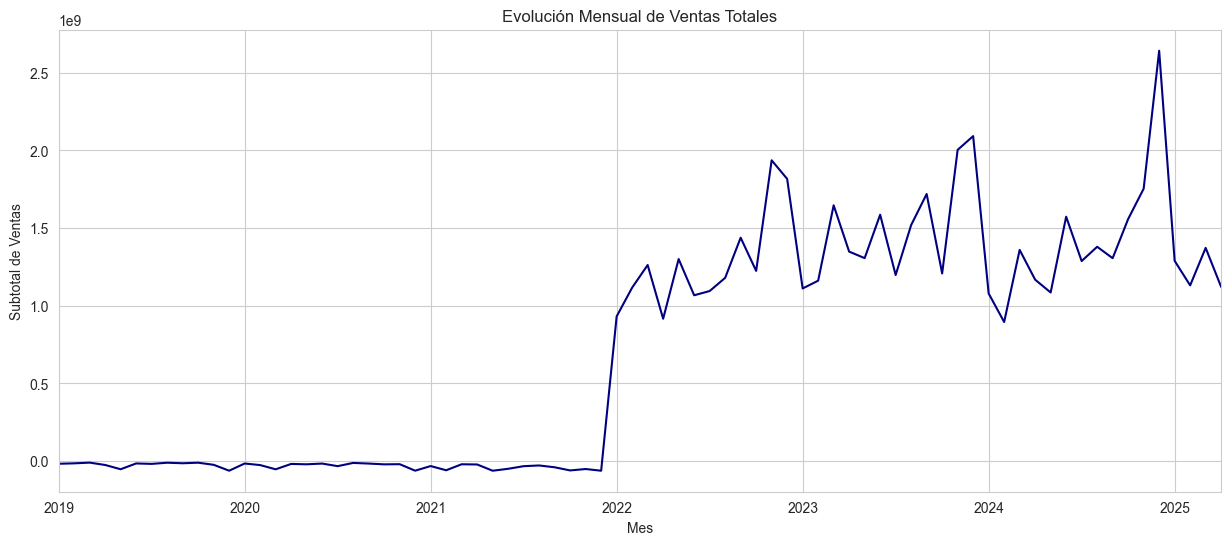

In [12]:
# --- 1. Análisis de Ventas a lo Largo del Tiempo (Usando 'defecha') ---
print("Análisis de la evolución mensual de ventas...")

# Hacemos una copia para no modificar el DataFrame original en esta celda
df_ventas_temp = df_ventas_items.copy()

# Nos aseguramos de que 'defecha' sea una columna antes de ponerla como índice
if 'defecha' not in df_ventas_temp.columns and df_ventas_temp.index.name == 'defecha':
    df_ventas_temp.reset_index(inplace=True)

# Ahora sí, podemos poner 'defecha' como índice con seguridad
df_ventas_temp.set_index('defecha', inplace=True)

# Agrupar las ventas por mes y sumar el subtotal
ventas_mensuales = df_ventas_temp['subtotal'].resample('M').sum()

# Visualización
plt.figure(figsize=(15, 6))
ventas_mensuales.plot(title='Evolución Mensual de Ventas Totales', color='navy')
plt.xlabel('Mes')
plt.ylabel('Subtotal de Ventas')
plt.show()


Análisis de los 10 productos más vendidos (por cantidad)...


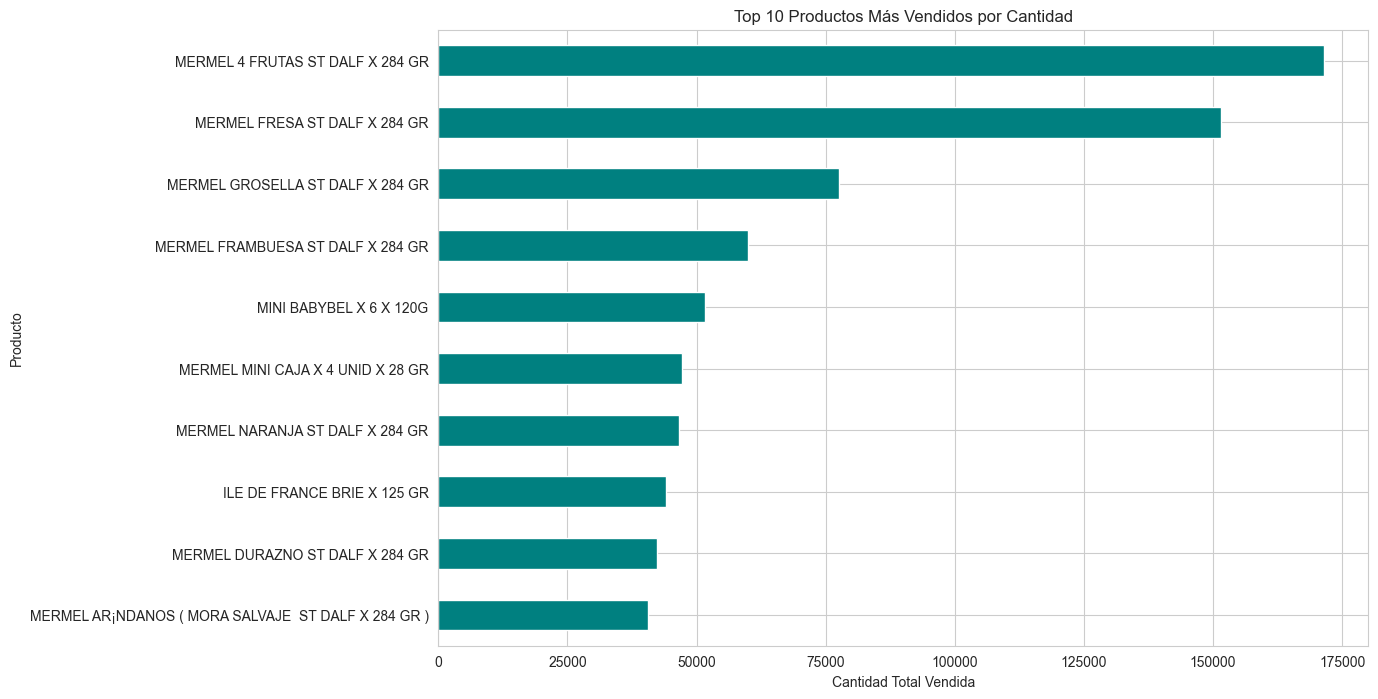

In [13]:
# --- 2. Análisis de Productos Más Vendidos ---
print("\nAnálisis de los 10 productos más vendidos (por cantidad)...")

# Agrupar por nombre de artículo y sumar la cantidad
top_10_productos = df_ventas_items.groupby('nombre_articulo_servicio')['cantidad'].sum().nlargest(10)

# Visualización
plt.figure(figsize=(12, 8))
top_10_productos.sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Productos Más Vendidos por Cantidad')
plt.xlabel('Cantidad Total Vendida')
plt.ylabel('Producto')
plt.show()


Análisis de los 10 clientes más importantes (basado en datos con cliente identificado)...
Analizando 162009 de 631714 transacciones que tienen cliente.


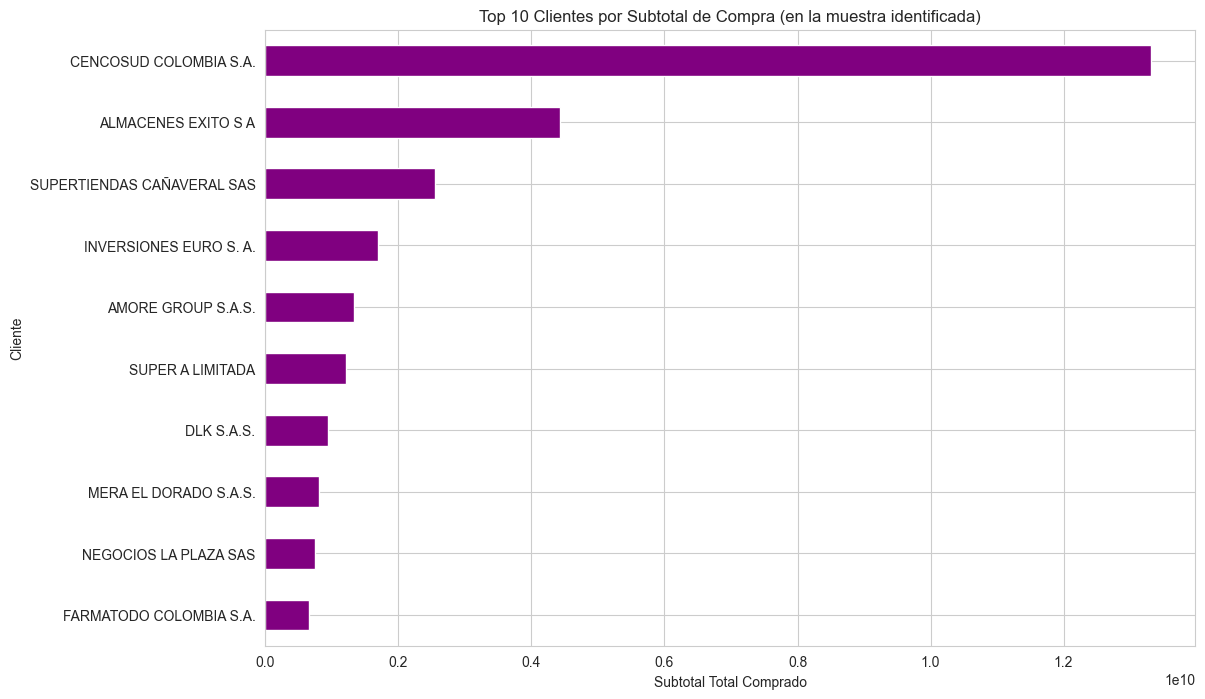

In [14]:
# --- 3. Análisis de Clientes Más Importantes ---
print("\nAnálisis de los 10 clientes más importantes (basado en datos con cliente identificado)...")

# Primero, filtramos las ventas que SÍ tienen un código de cliente
ventas_con_cliente = df_ventas_items.dropna(subset=['cod_cliente'])
print(f"Analizando {len(ventas_con_cliente)} de {len(df_ventas_items)} transacciones que tienen cliente.")

# Unimos las ventas con la tabla de clientes
# Nota: Hacemos una copia para no modificar el DataFrame original de clientes
if 'clientes' in dfs:
    df_clientes_temp = dfs['clientes'].copy()
    df_clientes_temp.rename(columns={'codigo': 'cod_cliente'}, inplace=True) # Renombrar para unir
    
    # Realizamos el merge
    ventas_completas = pd.merge(ventas_con_cliente, df_clientes_temp, on='cod_cliente', how='left')

    # Agrupar por razón social y sumar el subtotal
    top_10_clientes = ventas_completas.groupby('razon social')['subtotal'].sum().nlargest(10)

    # Visualización
    plt.figure(figsize=(12, 8))
    top_10_clientes.sort_values().plot(kind='barh', color='purple')
    plt.title('Top 10 Clientes por Subtotal de Compra (en la muestra identificada)')
    plt.xlabel('Subtotal Total Comprado')
    plt.ylabel('Cliente')
    plt.show()
else:
    print("El DataFrame 'clientes' no fue encontrado.")